## **Importing Libraries:**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Loading the Data**

In [ ]:
zip_file_path = '/content/drive/MyDrive/Titanic.zip'

In [ ]:
import zipfile
import os

# Path to the ZIP file
zip_file_path = '/content/drive/MyDrive/Titanic.zip'

# Directory where you want to extract the contents
extract_to_directory = '/content/drive/MyDrive/ExtractedFiles'

# Ensure the directory exists
os.makedirs(extract_to_directory, exist_ok=True)

# Extract the specific file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List all files in the ZIP archive
    print("Files in ZIP:", zip_ref.namelist())

    # Extract only 'train.csv' to the specified directory
    zip_ref.extract('train.csv', extract_to_directory)

print(f"train.csv has been extracted to {extract_to_directory}")


Files in ZIP: ['train.csv']
train.csv has been extracted to /content/drive/MyDrive/ExtractedFiles


## **Exploring the Data**
Examine the first few rows of the dataset to understand its structure


In [ ]:

csv_file_path = '/content/drive/MyDrive/ExtractedFiles/train.csv'
df = pd.read_csv(csv_file_path)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.sample(2) # show random data from dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.375,NaN,S


## **Data Overview**
Get a summary of the dataset including basic statistics

In [ ]:
df.shape

(891, 12)

In [ ]:
df.describe() # show statistical data from dataset


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.dtypes


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Check for Missing values :**

In [ ]:
df.isnull().sum()# show null data from dataset

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## **Data Cleaning:**

In [ ]:
df.drop(['Cabin'], axis=1, inplace=True) #axis=1 means delete entrire column if more than 50 percent are null simply drop

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True) # fill null data with mean

In [ ]:
df['Embarked'].value_counts() # embarked is categorical so mean cant be used to fill null

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
df["Embarked"].fillna("S" ,inplace=True) # fill null data with mode

In [ ]:
df.isnull().sum() # show null data from dataset

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
import seaborn as sns
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


## **Count of Survival Status:**
This count plot visualizes the distribution of survival outcomes among passengers on the Titanic. The plot shows the number of passengers who survived versus those who did not survive. Understanding this distribution helps in evaluating the proportion of survivors in the dataset and provides a foundation for analyzing factors influencing survival.

<Axes: xlabel='Survived', ylabel='count'>

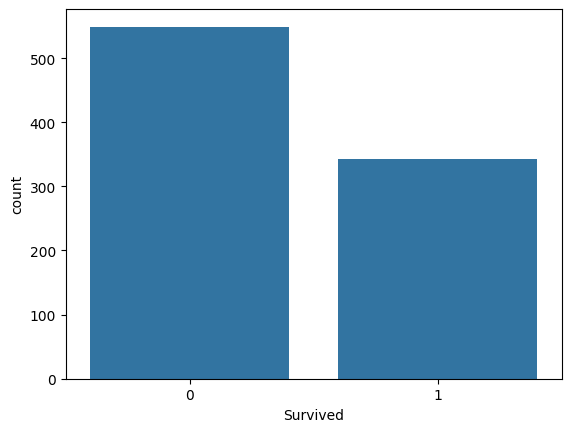

In [ ]:
sns.countplot(x='Survived', data=df)

**Survival Rate by Gender**

This count plot illustrates the distribution of survival outcomes by gender among passengers on the Titanic. The x-axis represents the gender of the passengers, while the hue differentiates between those who survived (Survived = 1) and those who did not survive (Survived = 0).

<Axes: xlabel='Sex', ylabel='count'>

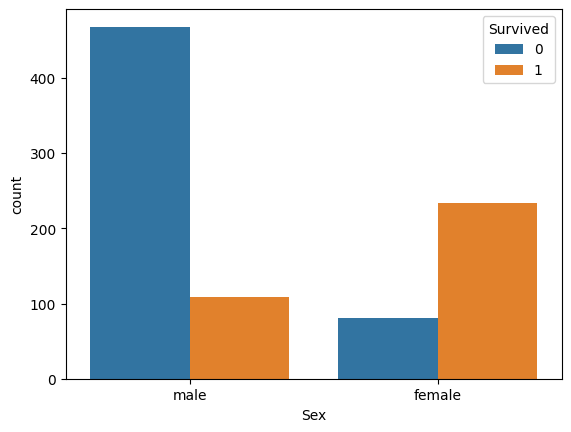

In [ ]:
sns.countplot(x='Sex',hue='Survived' ,data=df)

### **Survival Rate by Passenger Class**

<Axes: xlabel='Pclass', ylabel='count'>

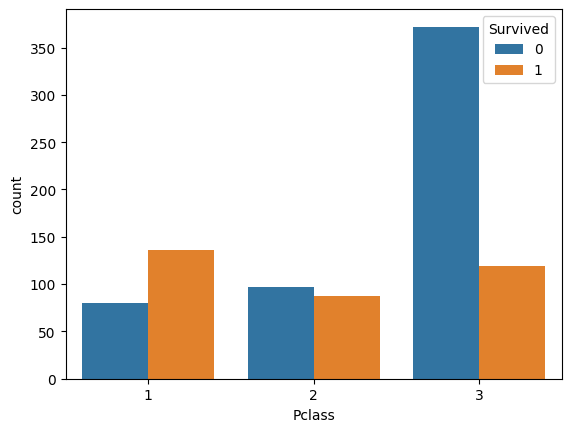

In [ ]:
sns.countplot(x='Pclass',hue='Survived' ,data=df)

## **Correlation Matrix Heatmap**

This heatmap displays the correlation matrix for the numeric features in the dataset. Understanding these correlations helps identify relationships between features and guide feature selection for model building.



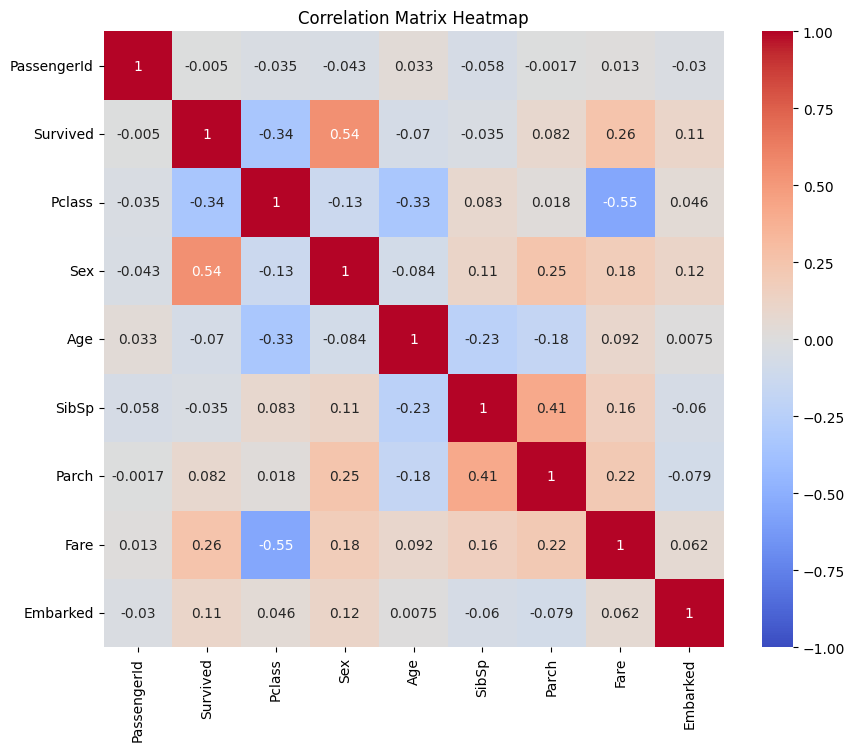

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


### **ENCODING CATEGORICAL VARIABLES**





In [ ]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [ ]:
X=df.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y=df['Survived']

## **Data Splitting:**

In [ ]:
# Split the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



## **Feature Scaling:**

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### **Model Training:**

In [ ]:

from sklearn.linear_model import LogisticRegression
# Train the model
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)

# Make predictions
Y_pred = model.predict(X_test_scaled)

## **Model Evaluation:**

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.80
